In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1 задание
В файле test_1 лежит результат теста. (target - какая-то целевая метрика)


Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

In [2]:
url = 'https://drive.google.com/file/d/1gLPTODwKvBMeQVp-pkpEQA9Hsto3w7w1/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(3)

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911


In [5]:
data.shape

(1998, 3)

In [6]:
data.dtypes

group         object
client_id      int64
target       float64
dtype: object

In [7]:
data.group.describe()

count     1998
unique       2
top       test
freq      1010
Name: group, dtype: object

In [8]:
control = data[data.group == "control"].target
test = data[data.group == "test"].target

C:\Users\volat\AppData\Local\Temp\ipykernel_1556\2690823555.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control, color = 'blue', hist = True, kde = False, ax = ax)
C:\Users\volat\AppData\Local\Temp\ipykernel_1556\2690823555.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test, color 

Text(0.5, 1.0, 'test')

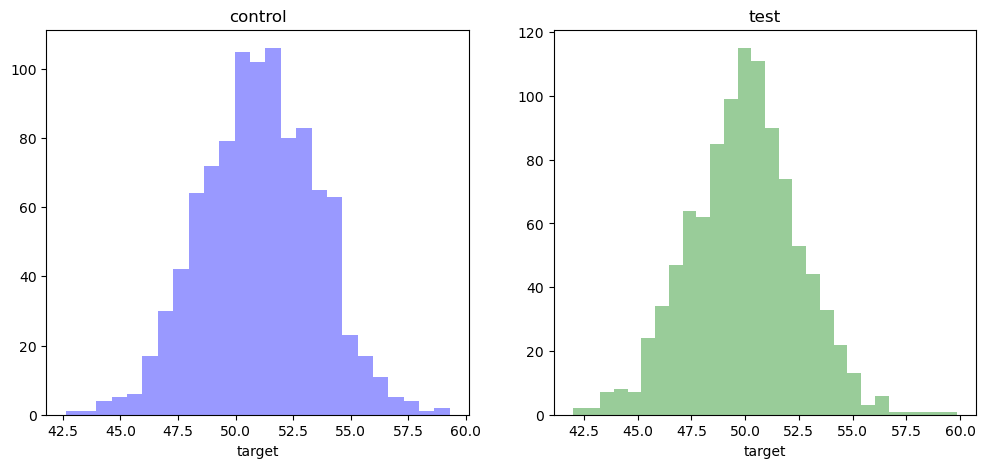

In [9]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(control, color = 'blue', hist = True, kde = False, ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(test, color = 'green', hist = True, kde = False, ax=ax)
ax.set_title('test')

#### Проверим данные на нормальность

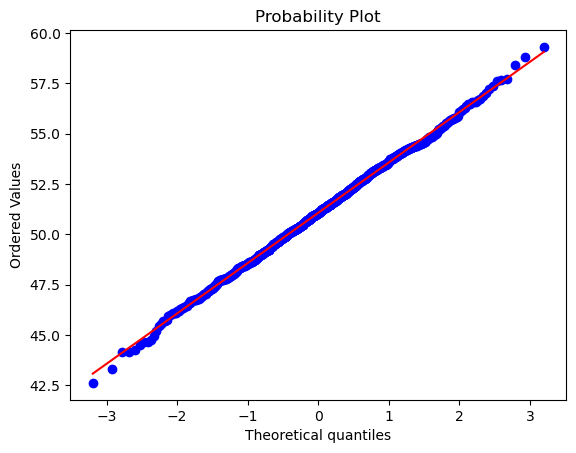

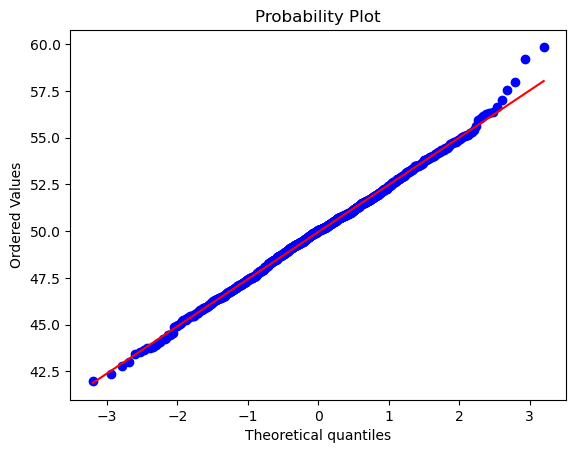

In [10]:
stats.probplot(control, dist="norm", plot=plt)
plt.show()

stats.probplot(test, dist="norm", plot=plt)
plt.show()

#### Критерий Шапиро-Уилка

Тест Шапиро-Уилка является является одним наиболее эффективных критериев проверки нормальности. Он используется для определения того, соответствует ли выборка нормальному распределению.

Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, выборка X которой известна, распределена по нормальному закону.

Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным.

Для выполнения теста Шапиро-Уилка предназначена функция stats.shapiro, принимающая на вход выборку Х объема не меньше 3 и не больше 5000.

Функция возвращает список со следующими компонентами:

• statistic – значение статистики теста, которую принято обозначать буквой W;

• p.value – апроксимация p-value для полученного значения статистики;

In [11]:
groups = [control, test]

In [12]:
# Критерий Шапиро-Уилка
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.05:
        print('Normal','W=',round(W_value,4),'|','p-value:',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'|','p-value:',round(p_value,4))

Normal W= 0.9992 | p-value: 0.9479
Normal W= 0.998 | p-value: 0.2942


При уровне значимости,  α = 0.05 гипотезы H0 о нормальности распределения не отклоняем.

### Тест

 Мы ожидаем, что таргет в тестовой группе будет выше. Важно понять, стал ли таргет выше или ниже. Поэтому мы формулируем двустороннюю альтернативную гипотезу!  -->

* H0 - средний таргет в группах не имет значимых различий;
* H1 - средний таргет в группах больше в тестовой выборке

Определим уровень значимости.
* Берем a = 0.05

**Рассчитаем статистику критерия Стьюдента**

![st](https://i.pinimg.com/originals/38/39/58/383958ca7ad8b647440bf3921ac2b6ad.png)

Вычислим средний таргет каждой группы

In [13]:
mean_a = np.mean(control)
mean_b = np.mean(test)
print('Средний таргет в контрольной группе = ',mean_a)
print('Средний таргет в тестовой группе = ',mean_b)

Средний таргет в контрольной группе =  51.067378748698374
Средний таргет в тестовой группе =  49.95894395407758


Дальше нам надо вычислить их разность, разницу берем по модулю без учета знака

In [14]:
mean_diff = mean_b - mean_a
print('Разница выборочных средних = ',mean_diff)

Разница выборочных средних =  -1.1084347946207913


Дальше вычисляем стандартную ошибку разности выборочных средних

In [15]:
#количество элементов в выборках
n1 = len(control)
n2 = len(test)

#дисперсии
var_a = np.var(control, ddof = 1)
var_b = np.var(test, ddof = 1)

#стандартные отклонения
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

#стандартная ошибка разности средних
sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)

print('Стандартная ошибка разности средних = ',sem)

Стандартная ошибка разности средних =  0.112196319715768


Получим статистику критерия

In [16]:
t = mean_diff/sem
print('t-критерий =', t)

t-критерий = -9.879422047254662


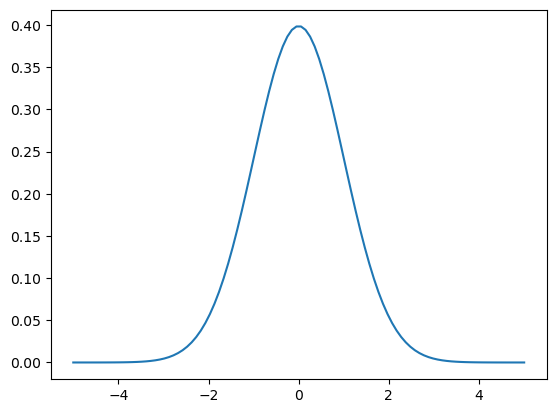

In [17]:
# Плотность вероятности -  при заданном распределении, какова вероятность наблюдения
x = np.linspace(-5.0, 5.0, 100)
# степени свободы
df = (n1 + n2) - 2
plt.plot(x, stats.t.pdf(x, df))

Получим p-value


**Уровень значимости** - вероятность ошибочного отклонения нулевой гипотезы или иными словами, вероятность совершения ошибки первого рода. Конечно, мы берем не саму вероятность, а задаем фиксированное число, которую наша наша вероятность не должна превышать.
Всем известные значения **p-value**, равные 0.05,0.01 и 0.001 - это стандартные уровни статистической значимости, используемые аналитиками при проверке гипотез.
Иначе говоря, уровень значимости **(p-value)** – это наименьшее значение уровня значимости (т.е. вероятности отказа от справедливой гипотезы), для которого вычисленная проверочная статистика ведет к отказу от нулевой гипотезы. 

Кол-во степеней свободы =  1996
p_value =  8.314399342628984e-23


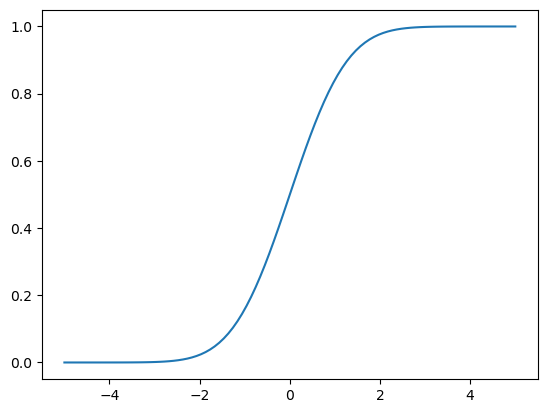

In [18]:
# степени свободы
df = (n1 + n2) - 2
x = np.linspace(-5.0, 5.0, 100)

print('Кол-во степеней свободы = ', df)

# Функция распределения показывает при заданном распределении (Стьюдента),
# какова вероятность того, что результат окажется меньше или равен заданному
plt.plot(x,stats.t.cdf(x, df) )
print("p_value = ", stats.t.cdf(t, df))

In [19]:
# степени свободы
df = (n1 + n2) - 2

# p - value
p = stats.t.cdf(t, df) 

if p > 0.05: 
    print('Нет статистически значимой разницы','\nt-критерий = ', round(t, 4),'\np-value =', round(p, 4))
else:
    print('Есть статистически значимая разница','\nt-критерий = ', round(t, 4),'\np-value =', round(p, 4))

Есть статистически значимая разница 
t-критерий =  -9.8794 
p-value = 0.0


Сформулируем гиппотезы
H0 - CR  не имет значимых различий;
H1 - средний таргет в группах больше в тестовой выборке
Также воспользуемся библиотекой scipy для расчета t-критерия и p-value

In [20]:
t2, p2 = stats.ttest_ind(control, test)


if p2 > 0.05:
    print('Нет статистически значимой разницы','\nt-критерий = ', round(t2, 4),'\np-value =', round(p2, 4))
else:
    print('Есть статистически значимая разница','\nt-критерий = ', round(t2, 4),'\np-value =', round(p2, 4))

Есть статистически значимая разница 
t-критерий =  9.8783 
p-value = 0.0
